In [2]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
from scipy import signal

In [6]:
path = './'
image = cv2.imread(path + 'labaImage.png', 0)

# Осуществить выделение контуров на входном изображении методом простого градиента.

In [7]:
def gradient(image):
    s1 = convol_image(image, np.array([[-1], [1]]))
    s2 = convol_image(image, np.array([[-1, 1]]))
    
    return np.abs(s1) + np.abs(s2)

def convol_image(image, mask):
    offset_x = int(mask.shape[0] / 2)
    offset_y = int(mask.shape[1] / 2)
    def conv_elem(i, j):
        result = 0
        for k in range(mask.shape[0]):
            for l in range(mask.shape[1]):
                result += image[i - offset_x + k, j - offset_y + l] * mask[k, l]
        return result
    result = np.zeros(image.shape)
    for i in range(offset_x, result.shape[0] - offset_x):
        for j in range(offset_y, result.shape[1] - offset_y):
            result[i, j] = conv_elem(i, j)
    return result

def plot_histogram(image):
    hist = cv2.calcHist([image.astype('uint8')], [0], None, [256], [0, 256])
    plt.plot(hist)
    
def process_threshold(image, threshold):
    image_threshold = image.copy()
    image_threshold[image < threshold] = 0
    image_threshold[image >= threshold] = 255
    
    return image_threshold

In [8]:
image_grad = gradient(image)

In [9]:
cv2.imwrite(path + 'gradient.jpg', image_grad)

True

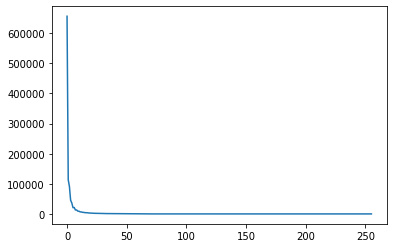

In [10]:
plot_histogram(image_grad)

In [11]:
image_grad_threshold = process_threshold(image_grad, 15)

In [12]:
cv2.imwrite(path + 'gradient_threshold.jpg', image_grad_threshold)

True

# Осуществить выделение контуров методами, указанными в задании.

# Оператор Собела

In [13]:
def sobel(image):
    s1 = convol_image(image, np.array([[-1, -2, -1], [0, 0, 0], [1, 2, 1]]))
    s2 = convol_image(image, np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]]))
    
    return np.abs(s1) + np.abs(s2)

In [14]:
sobel_image = sobel(image)

In [15]:
cv2.imwrite(path + 'sobel.jpg', sobel_image)

True

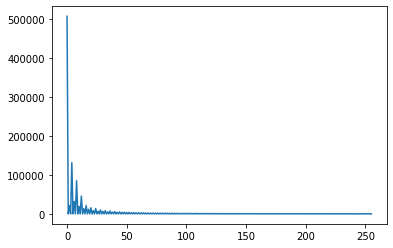

In [16]:
plot_histogram(sobel_image)

In [17]:
image_sobel_threshold = process_threshold(sobel_image, 100)

In [18]:
cv2.imwrite(path + 'sobel_threshold.jpg', image_sobel_threshold)

True

# Дифференциальный метод 1-го порядка. Аппроксимация поверхностью 1-го порядка, окно 3x3

In [19]:
def diff_method(image):
    mask_1 = np.array([[-1, -1, -1],
                       [0, 0, 0],
                       [1, 1, 1]])
    mask_2 = np.array([[-1, 0, 1],
                       [-1, 0, 1],
                       [-1, 0, 1]])
    s1 = convol_image(image, mask_1)
    s2 = convol_image(image, mask_2)
    
    return np.abs(s1) + np.abs(s2)

In [20]:
diff_image = diff_method(image)

In [21]:
cv2.imwrite(path + 'diff_image.jpg', diff_image)

True

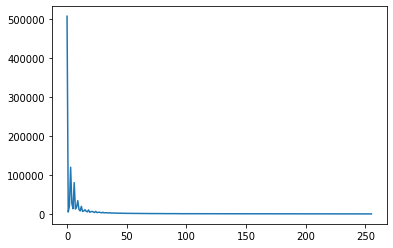

In [22]:
plot_histogram(diff_image)

In [23]:
diff_image_threshold = process_threshold(diff_image, 100)

In [24]:
cv2.imwrite(path + 'diff_image_threshold.jpg', diff_image_threshold)

True